In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [41]:
def DCF(priceBook : float, initialEPS : float, discount : float, numYears : int, cagrList : list, growthList : list):
    dcf = priceBook
    currentEPS = initialEPS
    year = 1
    for cagr, growth in zip(cagrList, growthList):
        currentEPS = currentEPS * cagr * growth
        dcf = dcf+currentEPS / (discount**year)
        year = year+1
    return dcf       


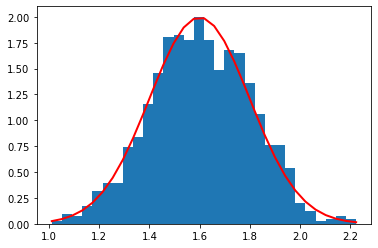

In [24]:
mu = 1.6
sigma = 0.2
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()


In [15]:
class monteCarloVar:
    def __init__(self, mu, sigma, numIter):
         self.mu = mu
         self.sigma = sigma
         self.generateSim(numIter)
    def generateSim(self, numIter : int):
        self.simVar = np.random.normal(self.mu, self.sigma, numIter)
        

In [44]:
numIter = 10000
cagrList = monteCarloVar(1.08, 0.008, [numIter,10])
initialEPS = monteCarloVar(0.47,0.02, numIter)
growth2022 = monteCarloVar(1.3,0.1, numIter)
growth2023 = monteCarloVar(1.6,0.1, numIter)
growth2024 = monteCarloVar(1.3,0.15, numIter)
growth2025 = monteCarloVar(1.6,0.2, numIter)
growth2026 = monteCarloVar(1.3,0.2, numIter)
growth2027 = monteCarloVar(1.1,0.2, numIter)
growth2028 = monteCarloVar(1.1,0.2, numIter)
growth2029 = monteCarloVar(1.1,0.2, numIter)
growth2030 = monteCarloVar(1.1,0.2, numIter)
growthBeast = [growth2022,growth2023,growth2024,growth2025,growth2026,growth2027,growth2028,growth2029,growth2030]
discount = 1.12
priceBook = 6.869303537
numYears = 20

In [45]:
def monteCarloSim(cagr, initialEPS, discount, growthBeast, priceBook, numYears):
    dcfList = []
    for i in range(0,numIter):
        growthList = []
        cagrList = []
        for growthYear, cagrVal in zip(growthBeast,cagr.simVar[i,:]):
            growthList.append(growthYear.simVar[i])
            cagrList.append(cagrVal)
        for i in range(0,10):
            growthList.append(1)
            cagrList.append(1)
        
        dcf = DCF(priceBook, initialEPS.simVar[i], discount, numYears, cagrList, growthList)
        dcfList.append(dcf)
    return dcfList
    
    

In [46]:
dcfList = monteCarloSim(cagrList, initialEPS, discount, growthBeast, priceBook, numYears)

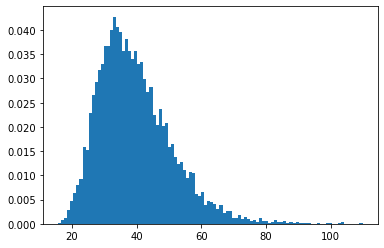

<Figure size 960x640 with 0 Axes>

In [51]:
count, bins, ignored = plt.hist(dcfList, 100, density=True)
figure(figsize=(12, 8), dpi=80)

plt.show()